# Logistic Regression Test

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Get the data
#The data is available here - https://www.kaggle.com/mohansacharya/graduate-admissions

data = pd.read_csv("C:/Users/amontagut/Desktop/Python/Datasets/Graduate_Admission_Kaggle/Admission_Predict_Ver1.1.csv")

data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [176]:
#Confusion Matrix function
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [177]:
#Data Cleaning

#Remove Serial No. column since it's the same as the index
data = data.drop(columns="Serial No.")


data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [178]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [179]:
#Bin rows based on chance of admittance. >0.5 = 1, <0.5 =0
for x in data.index:
    if data["Chance of Admit "].loc[x] >= 0.5:
        data["Chance of Admit "].loc[x] =1
    else:
        data["Chance of Admit "].loc[x]=0




C:\Users\amontagut\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [180]:
#Normalize Continuous Xs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']] = scaler.fit_transform(data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']])

data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,1,1.0
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,1,1.0
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,1,1.0
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,1,1.0
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,0,1.0
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,1,1.0
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,1,1.0
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,1,1.0
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,0,1.0


In [181]:
#Make sure everything worked
data["Chance of Admit "].value_counts()

#Looks like there are a lot more people who were admitted than not. Let's see if that affects our classifier.

1.0    463
0.0     37
Name: Chance of Admit , dtype: int64

# Build the Model

Train-test Split

In [182]:
data_copy = data

training_data = data_copy.sample(frac=0.70, random_state=0) #70/30 train/test split
testing_data = data_copy.drop(training_data.index)



In [183]:
training_X = training_data[training_data.columns[:-1]]
training_y = training_data["Chance of Admit "]

testing_X = testing_data[testing_data.columns[:-1]]
testing_y = testing_data["Chance of Admit "]

In [170]:
training_y_array = pd.DataFrame.to_numpy(training_y)

In [184]:
#Now let's build our model

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(training_X, training_y)

training_results = log_reg_model.predict(training_X)


C:\Users\amontagut\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


No handles with labels found to put in legend.


Training accuracy:  0.9542857142857143
Confusion matrix, without normalization
[[  7  15]
 [  1 327]]


<function matplotlib.pyplot.show(*args, **kw)>

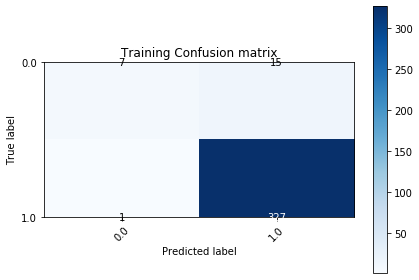

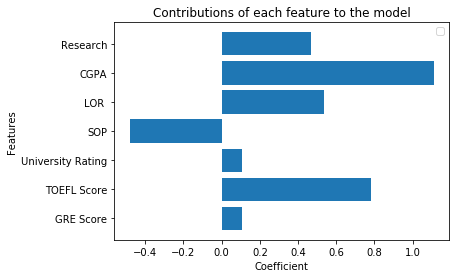

In [289]:
#Assess performance and characterize model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Get accuracy
training_accuracy = accuracy_score(training_results, training_y)

print("Training accuracy: ", training_accuracy)

#Confusion Matrix
training_cm = confusion_matrix(training_y, training_results)
fig = plot_confusion_matrix(training_cm, set(training_y),
                          normalize=False,
                          title='Training Confusion matrix',
                          cmap=plt.cm.Blues)

#Create a data frame of coefficients and their contributions to the model
model_coefficients = pd.DataFrame(log_reg_model.coef_).T
X_columns = pd.DataFrame(training_X.columns)

coeffs_and_columns = pd.concat([X_columns, model_coefficients], axis=1, ignore_index=True)
coeffs_and_columns.columns = ["Feature", "Coefficient"]

#Create horizontal bar chart
fig, ax = plt.subplots()
index=np.arange(len(coeffs_and_columns))

rects1 = plt.barh(index, coeffs_and_columns["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.yticks(index, coeffs_and_columns["Feature"])
plt.title("Contributions of each feature to the model")
plt.legend()

plt.show








Testing accuracy:  0.9333333333333333
Confusion matrix, without normalization
[[  6   1]
 [  9 134]]


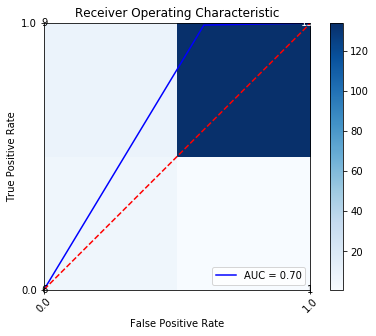

In [291]:
#Test data set

testing_results = log_reg_model.predict(testing_X)

#Get accuracy
testing_accuracy = accuracy_score(testing_results, testing_y)

print("Testing accuracy: ", testing_accuracy)

#Confusion Matrix
testing_cm = confusion_matrix(testing_results, testing_y)

plot_confusion_matrix(testing_cm, set(testing_y),
                          normalize=False,
                          title='Testing Confusion matrix',
                          cmap=plt.cm.Blues)

#ROC
# Compute ROC curve and ROC area for each class
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(testing_y, testing_results)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





In [293]:
np.arange(0,7)

array([0, 1, 2, 3, 4, 5, 6])